In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

##独立同一分布

独立同一分布とは、互いに独立でさらにそれぞれが同じ確率分布に従う多次元確率変数のこと。

In [2]:
linestyles = ['-','--',':','-.']

def E(XY , g):
  x_set , y_set , f_XY = XY 
  return np.sum([g(x_i , y_j)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def Cov(XY):
  x_set , y_set , f_XY = XY
  mean_X = E(XY , lambda x ,y :x)
  mean_Y = E(XY , lambda x ,y :y)
  return np.sum([(x_i - mean_X) *(y_j - mean_Y)*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

def f_X(x):
  return np.sum([f_XY(x , y_k) for y_k in y_set])

def f_Y(y):
  return np.sum([f_XY(x_k , y) for x_k in x_set])

### 独立であるとき
二次元確率変数（X,Y）が次のような関係が成り立つときXとYは独立であるという。<br>
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$<br>
すなわち、確率変数が独立である時、同時確率は周辺確率の積で書くことが出来る。<br>
→多次元でも同じ

### 独立性と無相関性
無相関性よりも独立性のほうが強い概念になっている。もっと言うと<br>
二つの確率変数X,Yが独立であるとき、XとYは無相関になっているが、<br>
XとYが無相関であるときXとYは必ずしも独立にはなっていない。

In [ ]:
#確認してみる
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x ,y):
  if x in x_set and y in y_set:
    return x * y /441
  else:
    return 0

XY = [x_set , y_set , f_XY]

In [ ]:
#共分散が0になっていることがわかる。
Cov(XY) 

-0.000

In [ ]:
x_set = np.array([0,1])
y_set = np.array([-1 , 0 , 1])

def f_XY(x, y):
  if (x , y) in [(0,0) , (1,1) , (1,-1)]:
    return 1 / 3
  else:
    return 0

XY = [x_set , y_set , f_XY]

In [ ]:
#無相関である確認
Cov(XY)

0.000

In [ ]:
#独立であるかの確認
#一致しないので独立であるとは言えない。
f_X(0)*f_Y(0) , f_XY(0 , 0)

(0.111, 0.333)

### 正規分布和の分布


In [9]:
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample) , np.var(sum_sample)
#X+Yの平均と分散は理論値に近い値になっていることが分かる。

(3.001, 5.007)

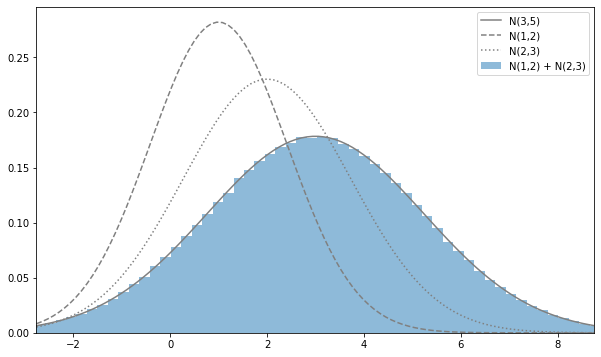

In [11]:
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)

rv = stats.norm(3 , np.sqrt(5))#平均３分散５の標準正規分布
xs = np.linspace(rv.isf(0.995) , rv.isf(0.005) , 100)

ax.hist(sum_sample , bins=100 , density = True , alpha = 0.5 , label = 'N(1,2) + N(2,3)')
ax.plot(xs , rv.pdf(xs) , label='N(3,5)' , color = 'gray')
ax.plot(xs , rv1.pdf(xs) , label='N(1,2)', ls = '--' , color = 'gray')
ax.plot(xs , rv2.pdf(xs) , label='N(2,3)', ls = ':', color = 'gray')

ax.legend()
ax.set_xlim(rv.isf(0.995) , rv.isf(0.005))
plt.show()

### ポアソン分布の和の分布


In [12]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample) , np.var(sum_sample)
#X+Yの平均と分散は理論値に近い値になっていることが分かる。
#ポアソン分布の平均と分散はλ

(6.998, 7.015)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


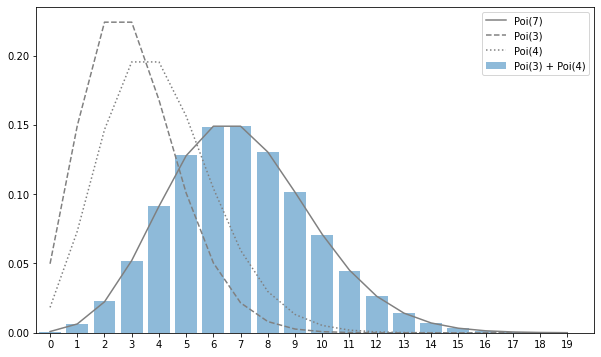

In [15]:
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)#平均7分散7の標準正規分布
xs = np.arange(20)
hist , _ = np.histogram(sum_sample , bins = 20 , range=(0,20) , normed=True)


ax.bar(xs,hist,alpha = 0.5,label = 'Poi(3) + Poi(4)')
ax.plot(xs , rv.pmf(xs) , label='Poi(7)' , color = 'gray')
ax.plot(xs , rv1.pmf(xs) , label='Poi(3)', ls = '--' , color = 'gray')
ax.plot(xs , rv2.pmf(xs) , label='Poi(4)', ls = ':', color = 'gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()


### 正規分布の標本平均の分布


In [16]:
mean = 1
var = 2
rv = stats.norm(mean , np.sqrt(var))

n = 10 
sample_size = int(1e6)
Xs_sample = rv.rvs((n , sample_size))
sample_mean = np.mean(Xs_sample , axis = 0)

np.mean(sample_mean) , np.var(sample_mean)
#しっかりと平均が１分散が2/10に近づいているということが分かる

(0.999, 0.200)

### ポアソン分布の標本平均の分布
これは中心極限定理によって正規分布に従うようになる。

In [17]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n , sample_size))
sample_mean = np.mean(Xs_sample , axis = 0)

np.mean(sample_mean) , np.var(sample_mean)

(2.999, 0.300)

### 中心極限定理

確率変数$X_1 , X_2 ,......,X_n$が互いに独立に期待値がμで分散が$σ^2$の確率分布に従っているとき、nが大きくなるにつれて標本平均$\bar{X}$の分布は正規分布$N（μ,σ^2/n）$に近づく。<br>
この確率分布はどのような確率分布であってもよい。

In [18]:
#ポアソン分布で標本平均の分布を見てみる。

l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n , sample_size))
sample_mean = np.mean(Xs_sample , axis = 0)

rv_true = stats.norm(l , np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999)  , rv_true.isf(0.001) , 100)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_

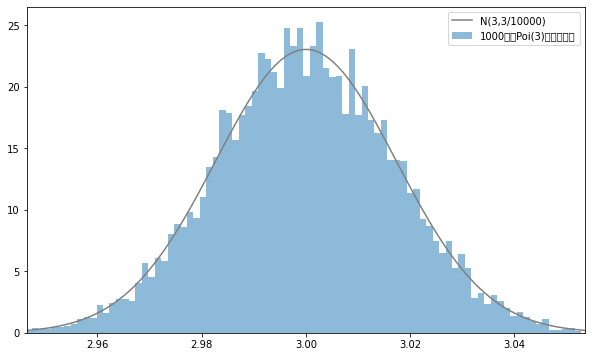

In [19]:
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)



ax.hist(sample_mean , bins=100 , density = True , alpha = 0.5 , label = '1000個のPoi(3)の標本平均')
ax.plot(xs , rv_true.pdf(xs) , label='N(3,3/10000)' , color = 'gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999) , rv_true.isf(0.001))
plt.show()

### 大数の法則

確率変数$X_1 , X_2 ,......,X_n$が互いに独立に期待値がμで分散が$σ^2$の確率分布に従っているとき、nが大きくなるにつれて標本平均はμに収束していく<br>

p=0.4のベルヌーイ試行を2万回おこなってみる。100回おきに区切り1回目からの観測された成功率を計算し0.4に近づいていくのかを見てみる。

In [20]:
import numpy as np
def Ber(n):
  coin = [0,1]
  prob = [6/10 , 4/10]
  trials = [np.sum(np.random.choice(coin , i , p = prob)) / i for i in range(100 , n + 1 , 100)]
  return trials

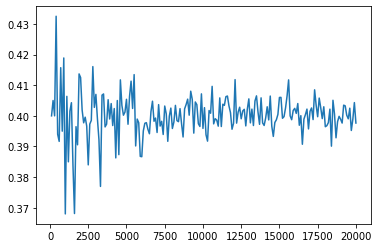

In [23]:
#回数を重ねるごとに0.4に収束していっているのが分かる
import matplotlib.pyplot as plt
prob_list = Ber(20000)
left = prob_list
height = [i for i in range(100 , 20001 , 100)]
plt.plot(height , left)